# こちらのコードを複製して使用してください
## 使用方法
1. 上の＞＞マークをクリックしてください
2. 小ウィンドウが表示されましたら右側赤色の「再起動とすべての出力をクリア」をクリックしてください
3. グラフとP値が一番下に表示されます
4. コードの注意書き(#のあとに記述しています)に従い、見やすいグラフになるようにカスタマイズしてください<br>以下1-4を繰り返します
<br>
<br>
カスタマイズでは以下の2点を最初に変更するといいと思います。コードの＃を目印に該当箇所を探してください
- グラフのy軸メモリを最小値、最大値で指定  
- dh:有意差バーの位置を変更　

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　なにかございましたら嶋田までお願いします

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sheet = "Sheet1"
df_example=pd.read_excel("example.xlsx",sheet_name=sheet)#example.xlsxをuplodeしたエクセルのファイル名に変更、Sheetを指定
df_example#こちらでエクセルファイルが正常に読み込めているかの確認 

,wt,ko/+,ko/ko
0,24.0,20.0,18
1,28.0,23.0,19
2,30.0,21.0,15
3,25.0,NaN,16
4,NaN,NaN,20


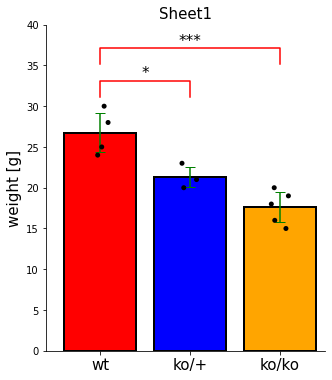

P値の算出
 wt - ko/+ : 0.02913
 wt - ko/ko : 0.00073

-----------------------------------------------------------------------------------------------------

有意差検定には Studentのt検定（両側）を使用しています
 *   is p < 0.05
 **  is p < 0.01
 *** is p < 0.001


In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

 
np.random.seed(42)
 
def barplot_annotate_brackets(num1, num2, data, center, 
                              height, yerr=None, dh=.05, 
                              barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.
  
    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """
  
    if type(data) is str:
        text = data
    
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
#         p = .05
          
        if 0.01 < data < 0.05:
            text = '*'
        elif 0.005 < data < 0.01:
            text = "**"
        elif data < 0.001:
            text = "***"
        if len(text) == 0:
            text = 'n. s.'
  
  
    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]
  
    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]
  
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
  
    y = max(ly, ry) + dh
  
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
  
    plt.plot(barx, bary, c='red')#color:有意差バーの色の変更
    
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
  
    plt.text(*mid, text, **kwargs, fontsize=15, color='black')
      
""" main """
# Generate toy data

x0 = df_example[df_example.columns[0]]
x0 = x0[np.logical_not(np.isnan(x0))]
x1 = df_example[df_example.columns[1]]
x1 = x1[np.logical_not(np.isnan(x1))]
x2 = df_example[df_example.columns[2]]
x2 = x2[np.logical_not(np.isnan(x2))]

 
# Welch’s t-test
t01_value, p01_value = stats.ttest_ind(x0, x1, equal_var=False)
t02_value, p02_value = stats.ttest_ind(x0, x2, equal_var=False)
t12_value, p12_value = stats.ttest_ind(x1, x2, equal_var=False)

# Student’s t-test
t01_value, p01_value = stats.ttest_ind(x0, x1, equal_var=True)
t02_value, p02_value = stats.ttest_ind(x0, x2, equal_var=True)
t12_value, p12_value = stats.ttest_ind(x1, x2, equal_var=True)
 
 
""" plot """
heights = [np.mean(x0), np.mean(x1), np.mean(x2)]
std = [np.std(x0), np.std(x1), np.std(x2)]
label = [df_example.columns[0], df_example.columns[1], df_example.columns[2]]
width = 0.8# 棒グラフの幅　1.0以下で変更
bars = np.arange(len(heights))
color_list=["red", "blue", "orange"]


  
plt.figure(figsize=(5, 6))#グラフ全体の大きさ(横, 高さ)

sns.stripplot(data=df_example, jitter=True, color='black')#color:棒グラフ上に描画されるサンプルの点の色を変更
plt.bar(bars, heights, width, tick_label=label, yerr=std, color=color_list, edgecolor="black",linewidth=2,
        align='center', alpha=1, ecolor='green', capsize=5)#color:棒グラフ自体の色 edgecolor:棒グラフのエッジの色 ecolor:エラーバーの色

plt.ylim(0, 40)#グラフのy軸メモリを最小値、最大値で指定
plt.xlim(-0.6, 2.5)


barplot_annotate_brackets(0, 1, p01_value, bars,
                          heights, yerr=std, dh=0.05)#dh:1番左と真ん中のサンプルの有意差バーの位置を変更
barplot_annotate_brackets(0, 2, p02_value, bars,
                          heights, yerr=std, dh=0.15)#dh:1番左と1番右のサンプルの有意差バーの位置を変更
# barplot_annotate_brackets(1, 2, p12_value, bars,
#                           heights, yerr=std,dh=0.28)#dh:1番左と1番右のサンプルの有意差バーの位置を変更


#グラフのタイトルなどの設定
# plt.xlabel("KO", fontsize=15)#x軸のラベル名
plt.xticks(fontsize=15)
plt.ylabel("weight [g]", fontsize=15)#y軸のラベル名
title = sheet
plt.title(title, fontsize=15)#グラフのタイトル
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# plt.tight_layout()
plt.savefig("{}.png".format(sheet))
plt.show()
print("P値の算出")
print(" {} - {} : {:.5f}".format(df_example.columns[0], df_example.columns[1], p01_value ))
print(" {} - {} : {:.5f}".format(df_example.columns[0], df_example.columns[2], p02_value ))
# print(" {} - {} : {:.5f}".format(df_example.columns[1], df_example.columns[2], p12_value ))
print("\n-----------------------------------------------------------------------------------------------------\n")
print("有意差検定には Studentのt検定（両側）を使用しています")
print(" *   is p < 0.05")
print(" **  is p < 0.01")
print(" *** is p < 0.001")
      
